In [10]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.circuit.library import EfficientSU2
from qiskit_algorithms.optimizers import COBYLA
from qiskit.primitives import Estimator
from qiskit.quantum_info import Pauli
from scipy.optimize import minimize
from qiskit.quantum_info import SparsePauliOp
from qiskit.quantum_info import Statevector
from math import sqrt


In [11]:
coeffs = [0, 1, 0]
paulis = ["I", "Z", "X"]

A_sparse = SparsePauliOp(paulis, coeffs)
print(A_sparse)


# Define the linear system Ax = b
b = np.array([1, 0])  # Right-hand side vector



SparsePauliOp(['I', 'Z', 'X'],
              coeffs=[0.+0.j, 1.+0.j, 0.+0.j])


In [12]:
# Define ansatz circuit (trial wavefunction)
def ansatz(params):
    circuit = QuantumCircuit(1)
    # circuit.h(0)
    circuit.rx(params[0], 0)
    circuit.ry(params[1], 0)
    circuit.rz(params[2], 0)
    return circuit

# Cost function to minimize (based on expectation value)
def cost_function(params):
    circuit = ansatz(params) #Ansatz circuit
    state = Statevector(circuit) #Statevector of the ansatz circuit
    observable = A_sparse#Operator A
    Ax_state = Statevector.evolve(state, observable)#A|psi>
    b_state = Statevector(b).conjugate()#|b>
    fidelity = b_state.inner(Ax_state)#<b|A|psi>
    # print(fidelity)#Print fidelity
    cost = abs(1 - fidelity)#Cost function
    print("Parameters:", params, "Cost:", cost)
    return cost


In [13]:
# Optimization process
initial_params = np.random.rand(3)
result = minimize(cost_function, initial_params, method='COBYLA')
optimal_params = result.x

# Display results
print("Optimal parameters:", optimal_params)
# Final quantum state with optimized parameters
final_circuit = ansatz(optimal_params)
print("Optimized quantum circuit:")
print("Final quantum state:")
final_state = Statevector(final_circuit)
print(final_state)

Parameters: [0.39182641 0.5249451  0.31065046] Cost: 0.11185394771458108
Parameters: [1.39182641 0.5249451  0.31065046] Cost: 0.2470518331018908
Parameters: [0.39182641 1.5249451  0.31065046] Cost: 0.2793986214366489
Parameters: [0.39182641 0.5249451  1.31065046] Cost: 0.5798501133910651
Parameters: [ 0.12937802  0.19970459 -0.59783149] Cost: 0.30322888793645164
Parameters: [ 0.26060222  0.36232484 -0.14359052] Cost: 0.09768313937057391
Parameters: [ 0.11086547  0.17676281 -0.06845303] Cost: 0.039409433794733766
Parameters: [-0.03409692 -0.01217962  0.00761708] Cost: 0.003708022733494742
Parameters: [-0.24262059 -0.14935065 -0.00659518] Cost: 0.015941782057353488
Parameters: [ 0.02137137 -0.08795294 -0.07488548] Cost: 0.03696564485607324
Parameters: [-0.0070931  -0.03216597  0.25534947] Cost: 0.1275225341412653
Parameters: [-0.08443181  0.08412796 -0.0541587 ] Cost: 0.02534047729902803
Parameters: [-0.0319671  -0.00744531  0.06990111] Cost: 0.034887187806181864
Parameters: [-0.01022013

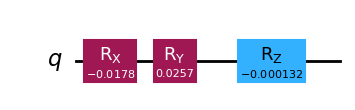

In [14]:
final_circuit.draw(output = 'mpl') 

In [15]:
final_state.evolve(A_sparse)

Statevector([ 0.9998779 -4.84773854e-05j, -0.01285281-8.88771107e-03j],
            dims=(2,))


In [16]:
b_state = Statevector(b)
b_state

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


In [17]:
# solving the linear system using scipy 
x = np.linalg.solve(A_sparse, b)
print("Exact solution:", x)

Exact solution: [1.+0.j 0.-0.j]


In [18]:
A_sparse.to_matrix()

array([[ 1.+0.j,  0.+0.j],
       [ 0.+0.j, -1.+0.j]])